In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [56]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [57]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

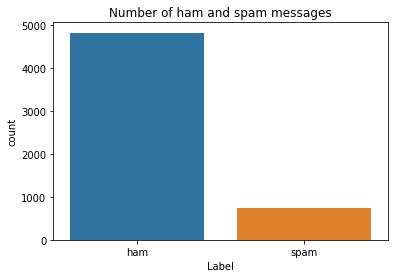

In [58]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [59]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [61]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [62]:
def RNN():
  inputs = Input(name='inputs',shape=[max_len])
  layer = Embedding(max_words,50,input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256,name='FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1,name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs,outputs=layer)
  return model

In [76]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_20 (Embedding)    (None, 150, 50)           50000     
                                                                 
 lstm_20 (LSTM)              (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_34 (Activation)  (None, 256)               0         
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257

In [77]:
history_base = model.fit(sequences_matrix, Y_train, batch_size=128, 
          epochs=10, validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 4s 59ms/step - loss: 0.3154 - accuracy: 0.8862 - val_loss: 0.1458 - val_accuracy: 0.9578
Epoch 2/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0862 - accuracy: 0.9786 - val_loss: 0.0702 - val_accuracy: 0.9810
Epoch 3/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0442 - accuracy: 0.9873 - val_loss: 0.0824 - val_accuracy: 0.9800
Epoch 4/10
30/30 [==============================] - 1s 39ms/step - loss: 0.0309 - accuracy: 0.9918 - val_loss: 0.0615 - val_accuracy: 0.9852
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0625 - val_accuracy: 0.9852
Epoch 6/10
30/30 [==============================] - 1s 38ms/step - loss: 0.0183 - accuracy: 0.9947 - val_loss: 0.0578 - val_accuracy: 0.9852
Epoch 7/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0696 - val_accuracy: 0.9852
Epoch 8/10
30

In [78]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [80]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 0s 13ms/step - loss: 0.1012 - accuracy: 0.9821


In [81]:
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
 Loss: 0.101
 Accuracy: 0.982


Спробуємо покращити дану модель

In [71]:
def RNN_better():
  inputs = Input(name='inputs',shape=[max_len])
  layer = Embedding(max_words,50,input_length=max_len)(inputs)
  layer = LSTM(128)(layer)
  layer = Dropout(0.6)(layer)
  layer = Dense(128,name='FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1,name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs,outputs=layer)
  return model

In [72]:
model_better = RNN_better()
model_better.summary()
model_better.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_18 (Embedding)    (None, 150, 50)           50000     
                                                                 
 lstm_18 (LSTM)              (None, 128)               91648     
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 FC1 (Dense)                 (None, 128)               16512     
                                                                 
 activation_30 (Activation)  (None, 128)               0         
                                                                 
 dropout_27 (Dropout)        (None, 128)               0  

In [73]:
history_better = model_better.fit(sequences_matrix, Y_train, batch_size=128, 
          epochs=10, validation_split=0.2)

Epoch 1/10
30/30 [==============================] - 4s 62ms/step - loss: 0.3476 - accuracy: 0.8735 - val_loss: 0.1290 - val_accuracy: 0.9673
Epoch 2/10
30/30 [==============================] - 1s 43ms/step - loss: 0.0900 - accuracy: 0.9773 - val_loss: 0.0896 - val_accuracy: 0.9726
Epoch 3/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0487 - accuracy: 0.9863 - val_loss: 0.0609 - val_accuracy: 0.9800
Epoch 4/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0378 - accuracy: 0.9897 - val_loss: 0.0554 - val_accuracy: 0.9863
Epoch 5/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0324 - accuracy: 0.9908 - val_loss: 0.0549 - val_accuracy: 0.9863
Epoch 6/10
30/30 [==============================] - 1s 40ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0669 - val_accuracy: 0.9873
Epoch 7/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0169 - accuracy: 0.9955 - val_loss: 0.0750 - val_accuracy: 0.9873
Epoch 8/10
30

In [82]:
accr = model_better.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 0s 14ms/step - loss: 0.0842 - accuracy: 0.9892


In [83]:
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
 Loss: 0.084
 Accuracy: 0.989


Text(0.5, 1.0, 'Графіки втрат покращеної моделі')

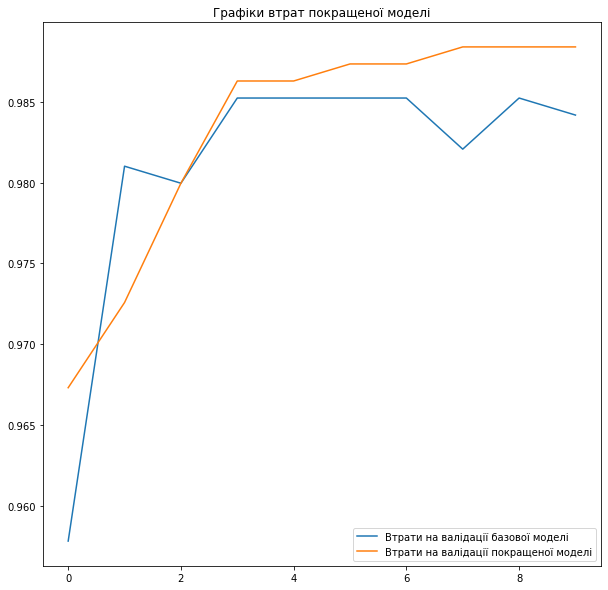

In [108]:
val_loss = history_base.history['val_accuracy']
val_loss_adv = history_better.history['val_accuracy']

epochs_range = range(10)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, val_loss, label='Втрати на валідації базової моделі')
plt.plot(epochs_range, val_loss_adv, label='Втрати на валідації покращеної моделі')
plt.legend(loc='lower right')
plt.title(f'Графіки втрат покращеної моделі')

**Usecase 2**

In [84]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
numpy.random.seed(7)

In [85]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [86]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [87]:
embedding_vecor_length = 32
lstm_model = Sequential()
lstm_model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 500, 32)           160000    
                                                                 
 lstm_21 (LSTM)              (None, 100)               53200     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 43s 105ms/step - loss: 0.4765 - accuracy: 0.7623 - val_loss: 0.3447 - val_accuracy: 0.8530
Epoch 2/3
391/391 [==============================] - 40s 102ms/step - loss: 0.2949 - accuracy: 0.8831 - val_loss: 0.3291 - val_accuracy: 0.8645
Epoch 3/3
391/391 [

In [100]:
lstm_adv_model = Sequential()
lstm_adv_model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

lstm_adv_model.add(LSTM(32))

lstm_adv_model.add(Dense(1, activation='sigmoid'))
lstm_adv_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_adv_model.summary())
lstm_adv_history = lstm_adv_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=256)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, 500, 32)           160000    
                                                                 
 lstm_35 (LSTM)              (None, 32)                8320      
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
98/98 [==============================] - 13s 104ms/step - loss: 0.5584 - accuracy: 0.7242 - val_loss: 0.3918 - val_accuracy: 0.8404
Epoch 2/3
98/98 [==============================] - 9s 92ms/step - loss: 0.3168 - accuracy: 0.8725 - val_loss: 0.3045 - val_accuracy: 0.8768
Epoch 3/3
98/98 [=======

In [101]:
scores = lstm_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.80%


In [102]:
scores = lstm_adv_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.01%


Text(0.5, 1.0, 'Графіки втрат покращеної моделі')

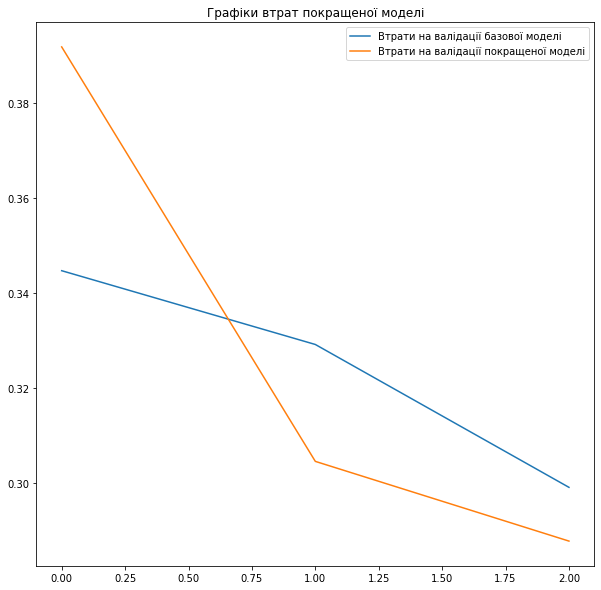

In [104]:
val_loss = lstm_history.history['val_loss']
val_loss_adv = lstm_adv_history.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, val_loss, label='Втрати на валідації базової моделі')
plt.plot(epochs_range, val_loss_adv, label='Втрати на валідації покращеної моделі')
plt.legend(loc='upper right')
plt.title(f'Графіки втрат покращеної моделі')

In [112]:
lstm_drop_model = Sequential()
lstm_drop_model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
lstm_drop_model.add(Dropout(0.2))
lstm_drop_model.add(LSTM(100))
lstm_drop_model.add(Dropout(0.2))
lstm_drop_model.add(Dense(1, activation='sigmoid'))
lstm_drop_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_drop_model.summary())
history = lstm_drop_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_39 (Embedding)    (None, 500, 32)           160000    
                                                                 
 dropout_38 (Dropout)        (None, 500, 32)           0         
                                                                 
 lstm_40 (LSTM)              (None, 100)               53200     
                                                                 
 dropout_39 (Dropout)        (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
391/391 [=======================

In [117]:
lstm_drop_adv_model = Sequential()
lstm_drop_adv_model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
lstm_drop_adv_model.add(Dropout(0.5))
lstm_drop_adv_model.add(LSTM(64))
lstm_drop_adv_model.add(Dropout(0.55))
lstm_drop_adv_model.add(Dense(1, activation='sigmoid'))
lstm_drop_adv_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_drop_adv_model.summary())
lstm_drop_adv_history = lstm_drop_adv_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=128)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_42 (Embedding)    (None, 500, 32)           160000    
                                                                 
 dropout_44 (Dropout)        (None, 500, 32)           0         
                                                                 
 lstm_43 (LSTM)              (None, 64)                24832     
                                                                 
 dropout_45 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
196/196 [=======================

Text(0.5, 1.0, 'Графіки втрат моделей з Dropout')

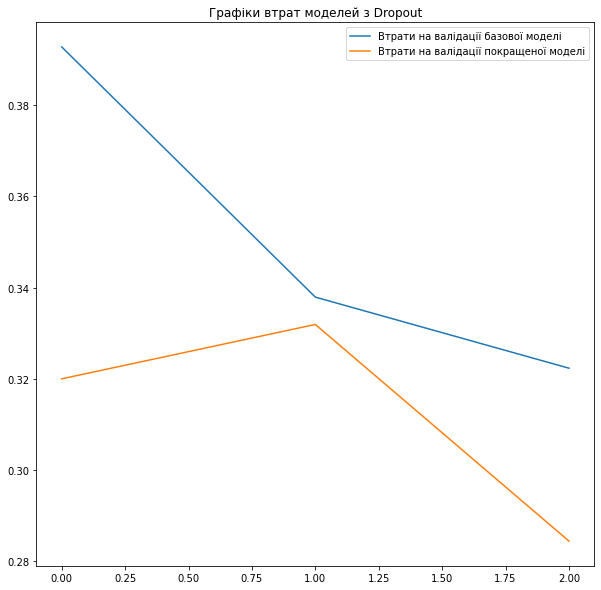

In [118]:
val_loss = history.history['val_loss']
val_loss_adv = lstm_drop_adv_history.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, val_loss, label='Втрати на валідації базової моделі')
plt.plot(epochs_range, val_loss_adv, label='Втрати на валідації покращеної моделі')
plt.legend(loc='upper right')
plt.title(f'Графіки втрат моделей з Dropout')

In [119]:
scores = lstm_drop_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.62%


In [120]:
scores = lstm_drop_adv_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.29%


In [122]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [126]:
lstm_cnn_model = Sequential()
lstm_cnn_model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
lstm_cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
lstm_cnn_model.add(MaxPooling1D(pool_size=2))
lstm_cnn_model.add(LSTM(100))
lstm_cnn_model.add(Dense(1, activation='sigmoid'))
lstm_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_cnn_model.summary())
lstm_cnn_model_history = lstm_cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_47 (Embedding)    (None, 500, 32)           160000    
                                                                 
 conv1d_3 (Conv1D)           (None, 500, 32)           3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 lstm_47 (LSTM)              (None, 100)               53200     
                                                                 
 dense_36 (Dense)            (None, 1)                 101       
                                                                 
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
_______________________________________________

In [143]:
lstm_cnn_adv_model = Sequential()
lstm_cnn_adv_model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
lstm_cnn_adv_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
lstm_cnn_adv_model.add(MaxPooling1D(pool_size=2))
lstm_cnn_adv_model.add(Dropout(0.3))
lstm_cnn_adv_model.add(LSTM(40))
lstm_cnn_adv_model.add(Dropout(0.3))
lstm_cnn_adv_model.add(Dense(1, activation='sigmoid'))
lstm_cnn_adv_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_cnn_adv_model.summary())
lstm_cnn_adv_model_history = lstm_cnn_adv_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=128)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_64 (Embedding)    (None, 500, 32)           160000    
                                                                 
 conv1d_20 (Conv1D)          (None, 500, 32)           3104      
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 250, 32)          0         
 g1D)                                                            
                                                                 
 dropout_76 (Dropout)        (None, 250, 32)           0         
                                                                 
 lstm_64 (LSTM)              (None, 40)                11680     
                                                                 
 dropout_77 (Dropout)        (None, 40)                0         
                                                     

Text(0.5, 1.0, 'Графіки втрат моделей з CNN')

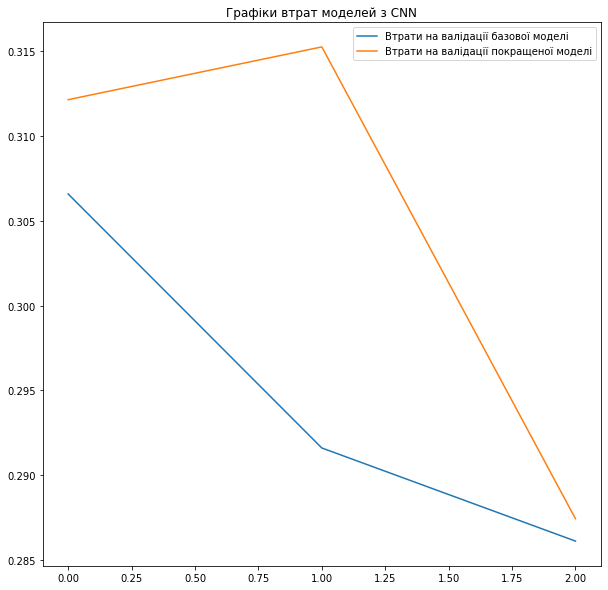

In [148]:
val_loss = lstm_cnn_model_history.history['val_loss']
val_loss_adv = lstm_cnn_adv_model_history.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, val_loss, label='Втрати на валідації базової моделі')
plt.plot(epochs_range, val_loss_adv, label='Втрати на валідації покращеної моделі')
plt.legend(loc='upper right')
plt.title(f'Графіки втрат моделей з CNN')

In [146]:
scores = lstm_cnn_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.55%


In [147]:
scores = lstm_cnn_adv_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.42%


Text(0.5, 1.0, 'Графіки втрат моделей різних конфігурацій')

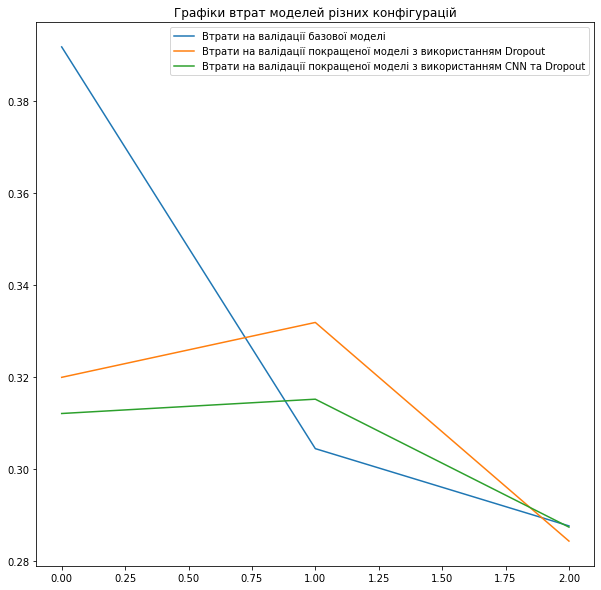

In [153]:
val_loss_adv = lstm_adv_history.history['val_loss']
val_loss_drop_adv = lstm_drop_adv_history.history['val_loss']
val_loss_cnn_adv = lstm_cnn_adv_model_history.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, val_loss_adv, label='Втрати на валідації базової моделі')
plt.plot(epochs_range, val_loss_drop_adv, label='Втрати на валідації покращеної моделі з використанням Dropout')
plt.plot(epochs_range, val_loss_cnn_adv, label='Втрати на валідації покращеної моделі з використанням CNN та Dropout')
plt.legend(loc='upper right')
plt.title(f'Графіки втрат моделей різних конфігурацій')

In [154]:
scores = lstm_adv_model.evaluate(X_test, y_test, verbose=0)
print("Val_accuracy: %.2f%%" % (scores[1]*100))

Val_accuracy: 88.01%


In [155]:
scores = lstm_drop_adv_model.evaluate(X_test, y_test, verbose=0)
print("Val_accuracy with dropout: %.2f%%" % (scores[1]*100))

Val_accuracy with dropout: 88.29%


In [156]:
scores = lstm_cnn_adv_model.evaluate(X_test, y_test, verbose=0)
print("Val_accuracy with CNN: %.2f%%" % (scores[1]*100))

Val_accuracy with CNN: 88.42%
